<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Inference and Prediction
              
</p>
</div>

Data Science Cohort Live NYC 2023
<p>Phase 3</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

**Inference**

- Hypothesis testing based on limited information.

**In the context of t-testing on means**:

The **sample mean** of the Gabonese elephants vs. the mean of the savannah population.

Is there a significant difference between the Gabonese and general Savannah population?

<center><img src = "Images/elephants.jpg" align = center width = 400></center>
<center>Forest vs. Savannah elephants</center>

**In the context of chi-squared testing**:

Character classes preferences for MMORPG players:
- UK **sample count distribution**.
- Expected from US population.

Is there a significant difference in class preferences between UK and US users?

<center><img src = "Images/mmorpg.png" align = "center" width = 800 /></center>
<center>Bombergirl looks like some fun.</center>

**In the context of linear regression**:



- Does the total population in a country have any correlation with its average life expectancy?
- Which factors can be said to have **statistically significant** effects on explaining the variance in life expectancy?
- What is the weight of each factor? What is our uncertainty in this weight?

<center><img src = "Images/jaffer.png" width = 400></center>
<center>You are keeping him waiting for answers...</center>

- Get data.
- Make inference from a statistic/estimator based off the data (sample):
    - sample mean $\bar{X}$
    - sample median
    - $\hat{\beta}_1$, $\hat{\beta}_0$ from linear regression on dataset.

In [9]:
import pandas as pd
import numpy as np
#load WHO dataset: all countries health data 2001-2015
WHO_df = pd.read_csv('Data/WHO_life.csv').dropna()

# stripping white space on column names
WHO_df.columns = WHO_df.columns.str.strip()

In [10]:
WHO_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10  BMI                              1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio                    

Let's drop some columns that are too obviously correlated with the life expectancy (e.g., adult mortality, as an example). Also let's try and see if we can develop a robust relationship that is applicable across country or country status. Let's also remove the year as a variable (data is over the past 15 years.

In [11]:
X = WHO_df.drop(columns = ['Adult Mortality', 'infant deaths', 'Year', 'Status', 'Country', 'Life expectancy'])

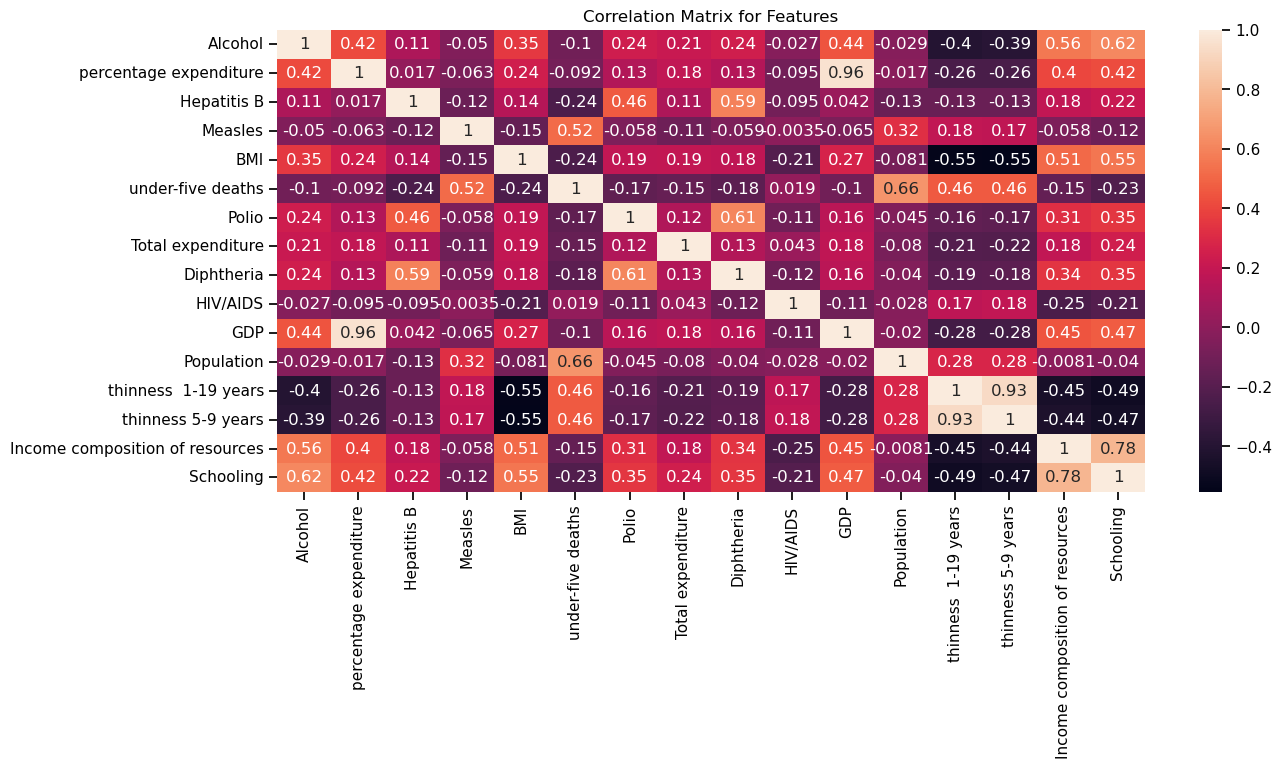

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook")
sns.set_palette("tab10")

plt.figure(figsize=(14, 6))
sns.heatmap(X.corr(), annot=True)

plt.title('Correlation Matrix for Features')
#plt.savefig("corrmat.jpg", dpi = 300)
plt.show()

In [13]:
feature_cols = ['HIV/AIDS', 'BMI', 'Population', 'Polio', 'Alcohol', 'GDP', "Schooling"]
X = WHO_df[feature_cols]
# standardize features
X_standard = X.apply(lambda x: (x - x.mean())/x.std() )
y = WHO_df['Life expectancy']
y_standard = (y - y.mean())/y.std()

In [14]:
#or
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled =scaler.fit_transform(X)

# turn into dataframes
X_standard = pd.DataFrame(X_scaled,
                          columns=X.columns,
                          index=X.index)

Which of these factors affect life expectancy? Their relative weights?

- Confidence intervals of weights
- Key here is *understanding* of relationships between dependent and independent variables.
- Minimal model explaining variance.

We did this kind of statistical inference with statsmodels.

In [15]:
import statsmodels.api as sm
X_aug = sm.add_constant(X_standard)
res = sm.OLS(y_standard, X_aug).fit()

In [16]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life expectancy   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     744.3
Date:                Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:42:52   Log-Likelihood:                -1161.0
No. Observations:                1649   AIC:                             2338.
Df Residuals:                    1641   BIC:                             2381.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        7.34e-16      0.012   6.08e-14      1.000      -0.024       0.024
HIV/AIDS      -0.4367      0.013    -34.667      0.000      -0.461      -0.412
BMI            0.1412      0.015      9.629      0.000       0.112       0.170
Population     0.0017      0.012      0.141      0.888      -0.022       0.026
Polio          0.0693      0.013      5.366      0.000       0.044       0.095
Alcohol       -0.0396      0.016     -2.487      0.013      -0.071      -0.008
GDP            0.1314      0.014      9.361      0.000       0.104       0.159
Schooling      0.4953      0.019     26.746      0.000       0.459       0.532
==============================================================================
Omnibus:                       16.028   Durbin-Watson:                   0.434
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.402
Skew:                          -0.173   Prob(JB):                     0.000101
Kurtosis:                       3.384   Cond. No.                         2.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Prediction

Emphasis is different:
- Want to build a little machine:

<center><img src = "Images/machine-learning-prediction.png" /></center>

E.g.,

- Input: Features reflecting socioeconomic factors of Zamunda  
    
- Output: Life expectancy of Zamunda

<center><img src = "Images/machine-learning-prediction.png" /></center>

- Getting good estimates of feature weights, their confidence intervals matter less here.
- Less emphasis on building minimal explanatory model.
- As long as it improves performance of machine, add more predictors


**Prediction Mode**
1. Use data (sample) to train model.
2. How well, on the average, does model **simulate** process (population) that generated sample? Evaluate/test model.
3. Use model to make prediction on new data.

Statsmodels good for statistical inference.
- Scikit-learn good for training/testing/prediction.
- Designed as general machine-learning framework

<img src = "Images/sklearn.png" width = 600/>

Let's use linear regression in scikit-learn.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Define the linear regression model

In [18]:
lr = LinearRegression()
lr

LinearRegression()

Training a model
- Training: model optimizes parameters to best fit the data.
- In this case: fit regression coefficients minimizing least squared error.
- Essentially creates your prediction machine.

Testing a model
- Take data model has never seen.
- How well does modeling predict (generalize) on data it hasn't optimized to?

Need to do both.
- In practice: split dataset into train and test sets.
- Training set: optimize model on.
- Test set: evaluate model performance.

Scikit-learn:

Has function to do this.

train_test_split(X, y, test_size = ...)
- Shuffles data
- Leaves some fraction for testing and the rest for training.

In [19]:
# For this, I haven't standardized. 
# Take all the relevant columns 
col_selector = ['HIV/AIDS', 'Hepatitis B', 'BMI', 'Population', 'Polio',
                'Alcohol', 'GDP', 'Measles','Total expenditure', 'Schooling', 'thinness  1-19 years']
X = WHO_df[col_selector]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [20]:
print(len(X_train))
print(len(X_test))

1154
495


#### Creating our prediction machine
- Train the model
- .fit(X,y) method trains the model

In [21]:
lr.fit(X_train, y_train)

LinearRegression()

Get the "learned" weights:
- Minimizing least squares objective function on training data.
- i.e. fit coefficients using training data.

In [22]:
lr.coef_

array([-6.39333194e-01, -2.36743023e-03,  5.22119423e-02,  1.11039022e-09,
        3.12975738e-02, -8.69331089e-02,  9.65947019e-05,  2.16763940e-05,
        7.63514087e-02,  1.43472824e+00, -1.04665907e-01])

In [23]:
lr.intercept_

48.7782958654801

In [24]:
X.columns

Index(['HIV/AIDS', 'Hepatitis B', 'BMI', 'Population', 'Polio', 'Alcohol',
       'GDP', 'Measles', 'Total expenditure', 'Schooling',
       'thinness  1-19 years'],
      dtype='object')

Now, can also get $R^2$ on fit.

In [25]:
lr.score(X_train, y_train)

0.7602870953644787

Evaluating our model on the test data:
- Get predictions of model.
- Compare predictions of model to actual y (life expectancy).

.predict(X_test) method on trained model

In [26]:
# This gets the predictions of model on test set.
y_pred = lr.predict(X_test)
#get first ten elements of prediction.
y_pred[0:10]

array([74.83182897, 70.61155213, 81.03967101, 73.0396306 , 76.54192315,
       67.90526231, 71.00123799, 78.27669519, 57.96706275, 67.75408216])

Evaluating the model:
- We care about how good prediction on life expectancy is given X (features).
- Compare $y_{pred}$ made on $X_{test}$ to actual $y_{test}$.
- Some metrics for comparison: the mean absolute error, the root mean squared error.

Mean absolute error:
$$ MAE = \frac{1}{N}\sum_i^N |y_{i}- \hat{y}_i|$$

where $\hat{y}_i$ is our prediction.

Root means squared error:
- More sensitive to outliers.

$$ RMSE = \sqrt{\frac{1}{N}\sum_i^N (y_{i}- \hat{y}_i)^2} $$

Evaluate model prediction on test set:

In [27]:
MAE = mean_absolute_error(y_pred, y_test)
MAE

3.4008674547435427

In [28]:
RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
RMSE

4.338596971623849

In [29]:
import matplotlib.pyplot as plt

In [30]:
%%capture life_test
fig, ax = plt.subplots()
y_test.hist(bins = 15, ax = ax)
ax.set_xlabel('Life expectancy')
ax.set_ylabel('Counts')
ax.set_title('Life expectancy: test distribution')
plt.show()

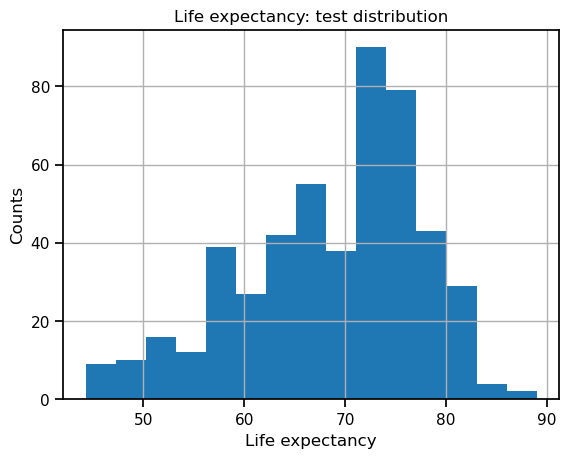

In [31]:
life_test()

From the perspective of prediction and our tolerance: this is not shabby.
- Seeing a few individual examples.

In [32]:
examp_idx = 10
single_examp = X_test.iloc[examp_idx].values
X_test.iloc[examp_idx]

HIV/AIDS                1.000000e-01
Hepatitis B             8.700000e+01
BMI                     5.440000e+01
Population              4.488263e+06
Polio                   8.000000e+00
Alcohol                 4.070000e+00
GDP                     6.893962e+02
Measles                 0.000000e+00
Total expenditure       9.690000e+00
Schooling               1.310000e+01
thinness  1-19 years    1.900000e+00
Name: 631, dtype: float64

In [33]:
lr.predict(single_examp.reshape(1,-1))

/opt/homebrew/Caskroom/miniforge/base/envs/learn-env/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([70.65278426])

In [34]:
y_test.iloc[examp_idx]

79.2

#### Determinants of prediction error
- Will talk about this in detail in a future lecture.

Much of machine learning focuses on understanding sources of error.
- Tuning model to get better prediction performance in test phase.
- Balancing tradeoffs between various sources of error.


The king wants you to:
- estimate the average life expectancy of his subjects. 
- speculate on what factors might be at play in determining the average life of his subject. 



#### Answering the king's first question:

In [ ]:
zamunda_dict = {'HIV/AIDS': 14.4, 'Hepatitis B': 93, 'BMI': 33.2, 'Population': 1884238, 'Polio': 96, 'Alcohol': 6.45,
       'GDP': 5374, 'Measles': 6, 'Total expenditure': 4.93, 'Schooling': 11.9, 'thinness  1-19 years': 9.6}

X_zamunda = pd.Series(zamunda_dict)
X_zamunda

Let's put this into the model and get our prediction. For a single example need to:
- convert to numpy array
- do a reshape to get into form scikit learn likes.

In [ ]:
X_zam_np = X_zamunda.values
X_zam_np

In [ ]:
# predict() needs to take a 2D array
X_zam_input = X_zam_np.reshape(1,-1)
X_zam_input

The model predicts a life expectancy for Zamunda of:

In [ ]:
lr.predict(X_zam_input)

Is this good? Is this bad? Compare to:

In [ ]:
life_test()

**Prediction**
- What is the average life expectancy of his subjects?
    - ~60 years.


**Inference**
- HIV/AIDS prevalence and Schooling
- High correlation with life expectancy